# Mae's workspace

I've decided that I'm going to try and look at the data on how many bus stops there are in each neighborhood, and use that metric to determine the best neighborhood in Pittsburgh. The higher the bustop density is, i.e. number of bustops over total neighborhood area, is the best one.


In [2]:
# First we need to import our data set
import geopandas as gpd # geopands because its a .dbf
import pandas as pd
import numpy as np

dbf = r'PAAC_Stops_1909.dbf'

table = gpd.read_file(dbf)

pdtable = pd.DataFrame(table)
pdtable.head()

,StopID,Stop_name,CleverID,Direction,Timepoint,Routes_ser,Routes_cou,Latitude,Longitude,Mode,Shelter,Stop_type,On_avwk_FY,Off_avwk_F,On_avwk__1,Off_avwk_1,AvgWkdy_De,geometry
0,E00175,26TH ST AT PENN AVE FS (SPRING WAY),2593.0,Inbound,N,"54, 88, 91",3.0,40.454635,-79.978170,Bus,No Shelter,Bus Stop,34.531580,43.900523,35,44,0.03,None
1,E00180,28TH ST AT LIBERTY AVE,2161.0,Inbound,N,54,1.0,40.456288,-79.974651,Bus,No Shelter,Bus Stop,1.304759,10.216890,1,10,0.03,None
2,E00270,32ND ST AT SPRING WAY,2410.0,Outbound,N,"54, 88, 91",3.0,40.460347,-79.969436,Bus,No Shelter,Bus Stop,13.184478,33.410865,13,33,0.04,None
3,E00420,40TH ST AT BUTLER ST,1199.0,Outbound,N,93,1.0,40.468655,-79.962115,Bus,No Shelter,Bus Stop,1.038249,28.682688,1,29,0.05,None
4,E00430,40TH ST AT DAVIDSON ST FS,20106.0,Outbound,N,93,1.0,40.467676,-79.960929,Bus,No Shelter,Bus Stop,0.163421,12.588603,0,13,0.00,None


Great! We have some sample data to look at. The issue we have now is that this doesn't include the neighbourhood that it's in. Bummer. We need to convert the coordinates of the bustop that it gives us into the Pittsburgh neighbourhood that it's in. For that we'll use geopy. I'm going to use the first stop for this example, 26th St at Penn Ave FS, in order to facillitate this. 

In [3]:
import geopy
from geopy.geocoders import Nominatim 

locator = Nominatim(user_agent="myGeocoder") # myGeocoder is a free web API for getting data on latitute and longitude coordinates
coordinates = "40.454635, -79.978170"
location = locator.reverse(coordinates)
print(location.raw)

ModuleNotFoundError: No module named 'geopy'

Now, I wasn't actually able to install geopy on JupyterHub, so instead I installed it on my own machine and ran my script there. The raw output from the code was as follows: 
```
{
   "place_id":287122303,
   "licence":"Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
   "osm_type":"way",
   "osm_id":11824114,
   "lat":"40.4546",
   "lon":"-79.978302",
   "display_name":"2599, 
Spring Way, Strip District, Pittsburgh, Allegheny County, Pennsylvania, 15222, United States",
   "address":{
      "house_number":"2599",
      "road":"Spring Way",
      "neighbourhood":"Strip District",
      "city":"Pittsburgh",
      "county":"Allegheny County",
      "state":"Pennsylvania",
      "postcode":"15222",
      "country":"United States",
      "country_code":"us"
   },
   "boundingbox":[
      "40.45455",
      "40.45465",
      "-79.978352",
      "-79.978252"
   ]
}
```

There it is! Under address.neighbourhood, it gives the name of the district it's in. And by checking those coordinates on google maps, we can verify that it is indeed the correct neighborhood. Amazing! Now I'm going to pack all of this up into a neat function that turns latitude and longitude coordinates into a Pitt neighbourhood

In [ ]:


def getDistrict(latitude, longitude):
    location = locator.reverse(latitude + ", " + longitude)
    if 'address' in location.raw:
        if 'neighbourhood' in location.raw["address"]:
            return location.raw['address']['neighbourhood']

    return 'N/A' # data is missing so return a placeholder

print(getDistrict("40.454635", "-79.978170")) # prints out 'Strip District'

Perfect! Now all that's left to do is iterate through every bus stop and increment each neighbourhood's counter in a dictionary each time a bus stop lands there.

In [ ]:
stops = {}
count = 0

for index, row in pdtable.iterrows():
    neighbourhood = getDistrict(str(row['Latitude']), str(row['Longitude']))
    if neighbourhood in stops:
        stops[neighbourhood] = stops[neighbourhood] + 1
    else:
        stops[neighbourhood] = 1
    
    count = count + 1
    print(str(count) + "/6946 : " + neighbourhood)

print(stops)

After letting that script run while I took a nap, here's the results I got:
```
{
   "Strip District":38,
   "Polish Hill":35,
   "Central Lawrenceville":10,
   "N/A":3328,
   "Shadyside":82,
   "Point Breeze":26,
   "Bellefield":12,
   "North Oakland":47,
   "Soho":35,
   "West Oakland":29,
   "South Oakland":20,
   "Larimer":63,
   "Point Breeze North":6,
   "Squirrel Hill North":31,
   "Downtown":97,
   "Squirrel Hill":40,
   "Eastwood":44,
   "Schenley Heights":22,
   "Garfield":40,
   "Four Mile Run":27,
   "Morningside":37,
   "Bloomfield":82,
   "Friendship":23,
   "Squirrel Hill South":86,
   "East Liberty":68,
   "Crawford-Roberts":27,
   "Greenfield":51,
   "Terrace Village":15,
   "Blackridge":8,
   "Bedford Dwellings":12,
   "Hazelwood":25,
   "Oakland":12,
   "Oakcliffe":3,
   "Regent Square":27,
   "Highland Park":38,
   "Lower Lawrenceville":34,
   "Lawrenceville":12,
   "Upper Lawrenceville":32,
   "Stanton Heights":29,
   "Upper Hill":1,
   "Hill District":19,
   "Middle Hill":13,
   "Nadine":13,
   "Hamnett Place":95,
   "Swisshelm Park":5,
   "Belmar":63,
   "Brushton":38,
   "East Hills":42,
   "Holiday Park":6,
   "Bluff":7,
   "Park Place":15,
   "Point Breeze South":1,
   "Homewood West":25,
   "Homewood North":24,
   "Homewood South":11,
   "Lincoln Park":16,
   "Frankstown Estates":27,
   "Crescent Hills":16,
   "Laketon Heights":2,
   "Homewood":18,
   "Glen Hazel":17,
   "Glenwood":39,
   "Lincoln-Lemington-Belmar":33,
   "North Bessemer":20,
   "Newfield":2,
   "Crestas Terrace":7,
   "Churchill Valley":1,
   "Universal":14,
   "Alcoma Estates":14,
   "Regency Park":13,
   "Penn Ridge":17,
   "Unity":16,
   "Eastvue":9,
   "Lincoln-Lemington":1,
   "Rosedale":2,
   "Rosedale Heights":9,
   "Shannon Heights":2,
   "Verona Hills":1,
   "Oakmont Commons":2,
   "Sandy Creek":7,
   "West Wilmerding":10,
   "Chateau":20,
   "Manchester":24,
   "Allegheny West":11,
   "California-Kirkbride":31,
   "Allegheny Center":19,
   "Evergreen":11,
   "Brighton Heights":66,
   "Central Northside":24,
   "Marshall-Shadeland":45,
   "Perry Hilltop":36,
   "Spring Hill":16,
   "Fineview":14,
   "East Allegheny":31,
   "Summer Hill":32,
   "Woods Run":15,
   "Perry South":16,
   "North Shore":7,
   "Troy Hill":46,
   "Northview Heights":22,
   "City View":18,
   "Perry North":34,
   "Hites":19,
   "Glassmere":1,
   "Natrona Heights":18,
   "Pleasantville":1,
   "Creighton":1,
   "River Valley":11,
   "Spring Garden":34,
   "Mexican War Streets Historic District":2,
   "Homestead Park":32,
   "Billy Buck Hill":21,
   "South Side Flats":59,
   "Bon Air":13,
   "Knoxville":41,
   "South Side Slopes":30,
   "Allentown":23,
   "Arlington":14,
   "Hays":9,
   "Beltzhoover":41,
   "Carrick":100,
   "Lincoln Place":27,
   "South Shore":15,
   "Overbrook":16,
   "St. Clair":2,
   "Mount Washington":97,
   "New Homestead":1,
   "Mount Oliver":14,
   "Brookline":48,
   "Mission Hills":24,
   "Corliss":35,
   "Windgap":19,
   "Fairywood":16,
   "Elliott":20,
   "Crafton Heights":42,
   "Sheraden":11,
   "Chartiers City":6,
   "Grace Manor":10,
   "Duquesne Heights":15,
   "McKees Rocks Bottoms":19,
   "East Carnegie":13,
   "Westwood":18,
   "Oakwood":16,
   "West End":10,
   "Esplen":9,
   "Banksville":15,
   "Beechview":29,
   "Cedarhurst Manor":20,
   "West Liberty":21,
   "Sunset Hills":4
}
```

Let's store all of the stops in our stops variable, and then we can compare the amount of stops in each district to its total area. Using Neighborhoods_.csv, we can get the number of square miles in the `sqmiles` column, and the name of the neighborhood in the `hood` column.

In [11]:
stops = {'Strip District': 38, 'Polish Hill': 35, 'Central Lawrenceville': 10, 'N/A': 3328, 'Shadyside': 82, 'Point Breeze': 26, 'Bellefield': 12, 'North Oakland': 47, 'Soho': 35, 'West Oakland': 29, 'South Oakland': 20, 'Larimer': 63, 'Point Breeze North': 6, 'Squirrel Hill North': 31, 'Downtown': 97, 'Squirrel Hill': 40, 'Eastwood': 44, 'Schenley Heights': 22, 'Garfield': 40, 'Four Mile Run': 27, 'Morningside': 37, 'Bloomfield': 82, 'Friendship': 23, 'Squirrel Hill South': 86, 'East Liberty': 68, 'Crawford-Roberts': 27, 'Greenfield': 51, 'Terrace Village': 15, 'Blackridge': 8, 'Bedford Dwellings': 12, 'Hazelwood': 25, 'Oakland': 12, 'Oakcliffe': 3, 'Regent Square': 27, 'Highland Park': 38, 'Lower Lawrenceville': 34, 'Lawrenceville': 12, 'Upper Lawrenceville': 32, 'Stanton Heights': 29, 'Upper Hill': 1, 'Hill District': 19, 'Middle Hill': 13, 'Nadine': 13, 'Hamnett Place': 95, 'Swisshelm Park': 5, 'Belmar': 63, 'Brushton': 38, 'East Hills': 42, 'Holiday Park': 6, 'Bluff': 7, 'Park Place': 15, 'Point Breeze South': 1, 'Homewood West': 25, 'Homewood North': 24, 'Homewood South': 11, 'Lincoln Park': 16, 'Frankstown Estates': 27, 'Crescent Hills': 16, 'Laketon Heights': 2, 'Homewood': 18, 'Glen Hazel': 17, 'Glenwood': 39, 'Lincoln-Lemington-Belmar': 33, 'North Bessemer': 20, 'Newfield': 2, 'Crestas Terrace': 7, 'Churchill Valley': 1, 'Universal': 14, 'Alcoma Estates': 14, 'Regency Park': 13, 'Penn Ridge': 17, 'Unity': 16, 'Eastvue': 9, 'Lincoln-Lemington': 
1, 'Rosedale': 2, 'Rosedale Heights': 9, 'Shannon Heights': 2, 'Verona Hills': 1, 'Oakmont Commons': 2, 'Sandy Creek': 7, 'West Wilmerding': 10, 'Chateau': 20, 'Manchester': 24, 'Allegheny West': 11, 'California-Kirkbride': 31, 'Allegheny Center': 19, 'Evergreen': 11, 'Brighton Heights': 66, 'Central Northside': 24, 'Marshall-Shadeland': 45, 'Perry Hilltop': 36, 'Spring Hill': 16, 'Fineview': 14, 'East Allegheny': 31, 'Summer Hill': 32, 'Woods Run': 15, 'Perry South': 16, 'North Shore': 7, 'Troy Hill': 46, 'Northview Heights': 22, 'City View': 18, 'Perry North': 34, 'Hites': 19, 'Glassmere': 1, 'Natrona Heights': 18, 'Pleasantville': 1, 'Creighton': 1, 'River Valley': 11, 'Spring Garden': 34, 'Mexican War Streets Historic District': 2, 'Homestead Park': 32, 'Billy Buck Hill': 21, 'South Side Flats': 59, 'Bon Air': 13, 'Knoxville': 41, 'South Side Slopes': 30, 'Allentown': 23, 'Arlington': 14, 'Hays': 9, 'Beltzhoover': 41, 'Carrick': 100, 'Lincoln Place': 27, 'South Shore': 15, 'Overbrook': 16, 'St. Clair': 2, 'Mount Washington': 97, 'New Homestead': 1, 'Mount Oliver': 14, 'Brookline': 48, 'Mission Hills': 24, 'Corliss': 35, 'Windgap': 19, 'Fairywood': 16, 'Elliott': 20, 'Crafton Heights': 42, 'Sheraden': 11, 'Chartiers City': 6, 'Grace Manor': 10, 'Duquesne Heights': 15, 'McKees Rocks Bottoms': 19, 'East Carnegie': 13, 'Westwood': 18, 'Oakwood': 16, 'West End': 10, 'Esplen': 9, 'Banksville': 15, 'Beechview': 29, 'Cedarhurst Manor': 20, 'West Liberty': 21, 'Sunset Hills': 4}

del stops['N/A'] # we don't care about these

hoods = pd.read_csv("Neighborhoods_.csv")
hoods.head(10)

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,shape_ar_1,page_number,plannerassign,created_user,created_date,last_edited_user,last_edited_date,temp,Shape__Area,Shape__Length
0,1293,201,42,003,980600,1,420039806001,Block Group 1,G5030,S,...,1.068826e+07,15,Stephanie Joy Everett,pgh.admin,2020/08/14 14:52:26.925+00,pgh.admin,2020/08/14 14:52:26.925+00,NaN,1.068796e+07,19600.573085
1,1294,10,42,003,261200,1,420032612001,Block Group 1,G5030,S,...,1.223202e+07,15,Stephanie Joy Everett,pgh.admin,2020/08/14 14:52:26.925+00,pgh.admin,2020/08/14 14:52:26.925+00,NaN,1.133208e+07,21174.473326
2,1295,11,42,003,260900,1,420032609001,Block Group 1,G5030,S,...,8.739570e+06,15,Stephanie Joy Everett,pgh.admin,2020/08/14 14:52:26.925+00,pgh.admin,2020/08/14 14:52:26.925+00,NaN,8.743618e+06,13811.917169
3,1296,7,42,003,262000,1,420032620001,Block Group 1,G5030,S,...,1.755059e+07,15,Stephanie Joy Everett,pgh.admin,2020/08/14 14:52:26.925+00,pgh.admin,2020/08/14 14:52:26.925+00,NaN,1.754935e+07,18197.745741
4,1297,8,42,003,261500,1,420032615001,Block Group 1,G5030,S,...,2.522062e+07,15,Stephanie Joy Everett,pgh.admin,2020/08/14 14:52:26.925+00,pgh.admin,2020/08/14 14:52:26.925+00,NaN,2.522420e+07,26390.549314
5,1298,31,42,003,250900,2,420032509002,Block Group 2,G5030,S,...,6.958774e+06,15,Stephanie Joy Everett,pgh.admin,2020/08/14 14:52:26.925+00,pgh.admin,2020/08/14 14:52:26.925+00,NaN,6.962440e+06,12620.549035
6,1299,58,42,003,250300,1,420032503001,Block Group 1,G5030,S,...,7.218352e+06,15,Stephanie Joy Everett,pgh.admin,2020/08/14 14:52:26.925+00,pgh.admin,2020/08/14 14:52:26.925+00,NaN,7.219561e+06,14391.314228
7,1300,59,42,003,241200,2,420032412002,Block Group 2,G5030,S,...,7.653279e+06,15,Stephanie Joy Everett,pgh.admin,2020/08/14 14:52:26.925+00,pgh.admin,2020/08/14 14:52:26.925+00,NaN,7.656111e+06,21431.626212
8,1301,61,42,003,240600,2,420032406002,Block Group 2,G5030,S,...,1.071729e+07,15,Stephanie Joy Everett,pgh.admin,2020/08/14 14:52:26.925+00,pgh.admin,2020/08/14 14:52:26.925+00,NaN,1.283815e+07,29607.526014
9,1302,64,42,003,563200,3,420035632003,Block Group 3,G5030,S,...,6.577920e+06,15,Stephanie Joy Everett,pgh.admin,2020/08/14 14:52:26.925+00,pgh.admin,2020/08/14 14:52:26.925+00,NaN,6.580348e+06,14429.463887


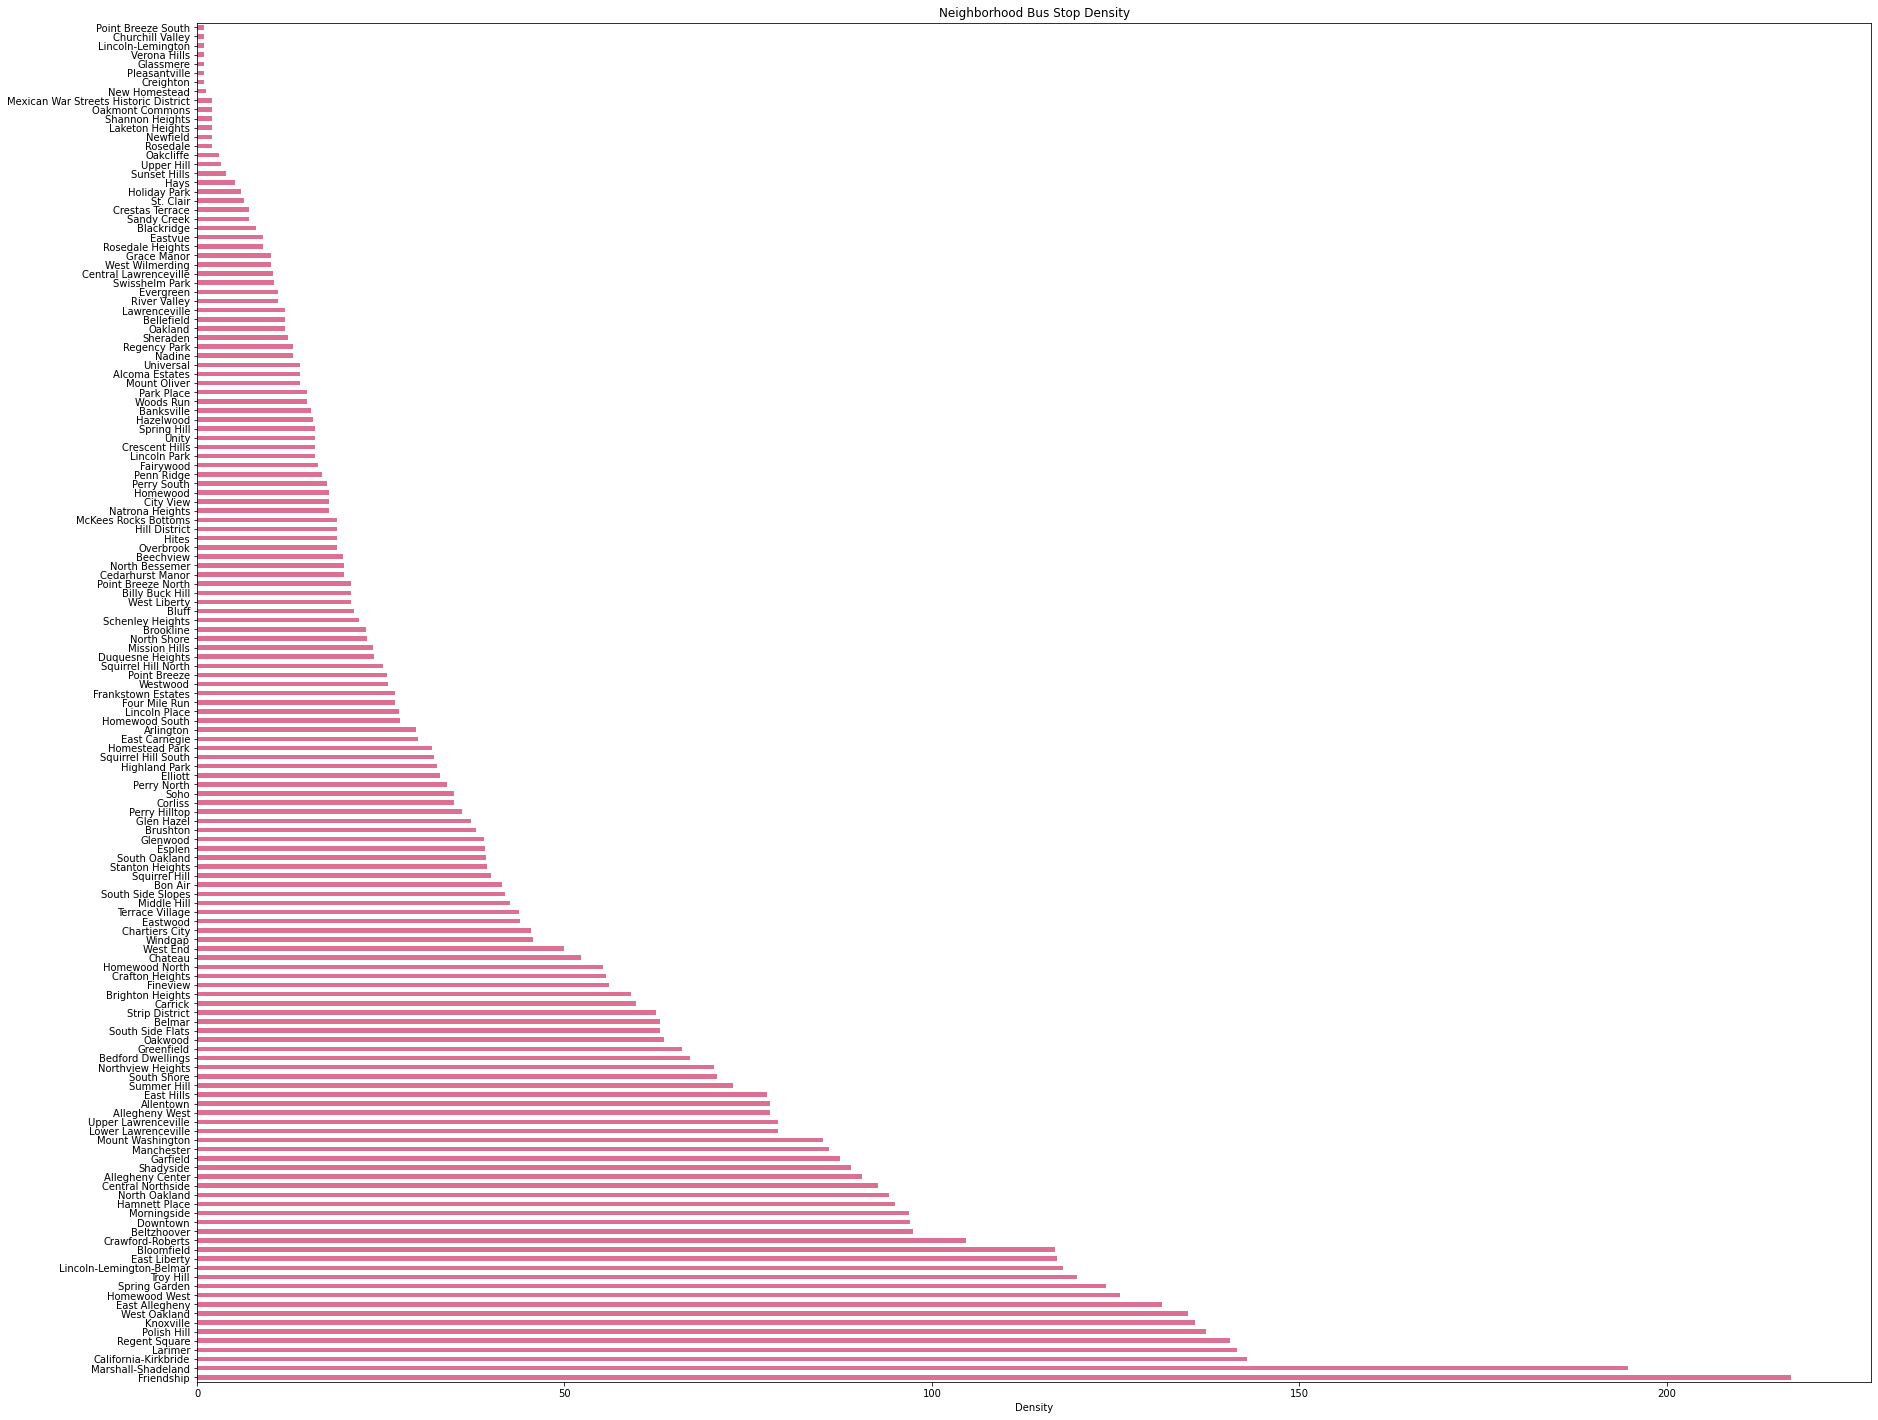

In [12]:
for index, row in hoods.iterrows():
    if row['hood'] in stops and row['sqmiles'] > 0:
        stops[row['hood']] = stops[row['hood']] / row['sqmiles']


stops = dict(sorted(stops.items(), key=lambda item: item[1])) # sort the stops

import matplotlib.pyplot as plt

data_graph = pd.Series(stops).sort_values(ascending=False)

data_graph.plot.barh(color = ["palevioletred"], #https://matplotlib.org/stable/gallery/color/named_colors.html
                     figsize=(30,25))

plt.title("Neighborhood Bus Stop Density")
plt.xlabel('Density')

plt.show()

Now we have a sorted dict of all of the bus stop per square miles values of every district in Pittsburgh, all that's left to do is get the top 10 or so values.

In [13]:
for x in list(reversed(list(stops)))[0:10]:
    print (x + ": " + str(stops[x]) + " stops per square mile")

Friendship: 216.9811320754717 stops per square mile
Marshall-Shadeland: 194.8051948051948 stops per square mile
California-Kirkbride: 142.85714285714286 stops per square mile
Larimer: 141.57303370786516 stops per square mile
Regent Square: 140.625 stops per square mile
Polish Hill: 137.2549019607843 stops per square mile
Knoxville: 135.76158940397352 stops per square mile
West Oakland: 134.88372093023256 stops per square mile
East Allegheny: 131.3559322033898 stops per square mile
Homewood West: 125.6281407035176 stops per square mile


# Conclusion
And we're done! Friendship comes in as the best district with almost 217 stops per square mile of bus stop density.